## Load in packages and modified FROMAGe

In [1]:
%cd ../..

/home/nils/NILS/Master/DL2/DL2-ZeroVis


In [2]:
#from src.fromage_inf.inf_utils import PromptParser
import numpy as np
import copy
import torch
import pickle
from transformers import logging
logging.set_verbosity_error()

from PIL import Image
#!pip install matplotlib
import matplotlib.pyplot as plt

from src.fromage_inf.fromage import models
from src.fromage_inf.fromage import utils

In [3]:
# parser = PromptParser("src/fromage_inf/fromage_model/",
#                       "src/fromage_inf/fromage_model/visual_embs.pt")

def trunc_caption(caption: str) -> str:
    # Truncate at period.
    trunc_index = caption.find('.') + 1
    if trunc_index < 0:
        trunc_index = caption.find('\n') + 1
    caption = caption[:trunc_index]
    return caption

def display_interleaved_outputs(model_outputs, one_img_per_ret=True):
    for output in model_outputs:
        if type(output) == str:
            print(output)
        elif type(output) == list:
            # Use this to display the single prompt image
            if one_img_per_ret:
                image = Image.open("src/benchmark/" + output[0] + ".jpg")
                image = image.resize((224, 224))
                image = image.convert('RGB')
                display(image)
            # Use this to display the RET image/s
            else:
                fig, ax = plt.subplots(1, len(output), figsize=(3 * len(output), 3))
                for i, img in enumerate(output):
                    image = np.array(img)
                    ax[i].imshow(img)
                    ax[i].set_title(f'Retrieval #{i+1}')
                plt.show()

In [4]:
# Load the relations dictionary to make the relations.
relations_dict = pickle.load(open("src/code/relations_dict.pkl", "rb"))

In [5]:
# model = parser.model
# relations = model.visual_embs
# Load model used in the paper.
model_dir = 'src/fromage_inf/fromage_model/'
model = models.load_fromage(model_dir)

Using facebook/opt-6.7b for the language model.
Freezing the LM.
Initializing embedding for the retrieval token [RET] (id = 50266).


# Zero-shot arithmetics

companies -> CEOs
Prompt:


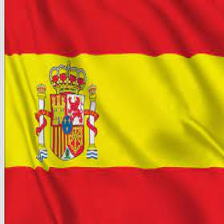

Q: What is this? 
A:
Model generated outputs:
 This is a flag of the country.


In [20]:
for relation, values in relations_dict.items():
    print(relation)
    print('=' * 120)
    for i in range(0, len(values)):
        tuple1 = values[i]
        
        if i == len(values)-1:
            tuple2 = values[0]
        else:
            tuple2 = values[i+1]

        # prompt = {
        #         "inputs": [
        #             "Task description: Analyze the analogy between the images and complete the analogy using visual reasoning: A is to B as C is to X.",
        #             "C:: {}".format("{" + tuple1[1] + "}"),
        #             "B: {}".format("{" + tuple2[0] + "}"),
        #             "A: {}".format("{" + tuple2[1] + "}"),
        #             "X: ",
        #             "Lets think step by step."
        #         ],
        #         "expected_output": "{}".format(tuple1[0])
        #     }
        # # prompt = {
        # #         "inputs": [
        # #             "Q: Lets perform arithmetics and subtract: {leaders/angela_merkel} from: {flags/germany}. Which word or words does this symbolize?",
        # #             "A: "
        # #         ],
        # #         "expected_output": "{}".format("flags/germany")
        # #     }
        # # Prompt can be path to json, e.g. 'res/example.json'
        # parser(prompt, root='./', max_img_per_ret=3)
        # prompt = ["Task description: Complete the following analogy."
        #     # "Task description: Analyze the analogy between the images and complete the analogy using visual reasoning.",
        #           "Q: {} is to {} as {} is to X.".format("Angela merkel", "germany", "Obama"),
        #         #   "C:: {}".format(model.visual_embs[tuple1[1]]),
        #         #   "B: {}".format(model.visual_embs[tuple2[0]]),
        #         #   "A: {}".format(model.visual_embs[tuple2[1]]),
        #           "Lets think step by step.",
        #           "[RET]",
        #         #   "Lets think step by step."
        #           ]
        # prompt = ["Q: What is 2 + 3 + 5 + 6? \nA: \n Lets think step by step."]
        # prompt = ["{} [RET]".format(model.visual_embs["flags/germany"])]
        # prompt = ["Task description: Given an image answer the presented question.",
        #           ["flags/spain"],
        #           "Question: What flag is this?",
        #           "Answer: This is the flag for spain.",
        #           ["flags/germany"],
        #           "Question: What is this?",
        #           "Answer: This is the flag for germany.",
        #           ["flags/canada"],
        #           "Question: What is this?",
        #           "Answer: This is the flag for [RET]"]
        # prompt = ["Task description: Finish the analogy."
        #           "Question: ", ['food/pizza'], " is to " ,
        #           ['flags/italy'], " as ",
        #           ['food/sushi'], " is to",
        #           "Answer: [RET]"]
        # prompt = ["Task description: Finish the analogy by answering who the person is.", 
        #           "The flag of", ['flags/germany'], "is to the leader ", ['leaders/angela_merkel'] , "as the flag of", ['flags/usa'], "is to the leader",
        #           "Answer: [RET]"]
        # prompts = [["Task description: Finish the analogy.", 
        #           "germany is to angela merkel as usa is to "],
        #           ["Task description: Finish the analogy.", 
        #             "germany is to ", ['leaders/angela_merkel'], " as usa is to "],
        #           ["Task description: Finish the analogy.", 
        #             "germany is to angela merkel as", ['flags/usa'], " is to "],
        #           ["Task description: Finish the analogy.", 
        #             ['flags/germany'], " is to angela merkel as usa is to "],
        #           ["Task description: Finish the analogy.", 
        #             ['flags/germany'], " is to angela merkel as", ['flags/usa'], " is to "],
        #           ["Task description: Finish the analogy.", 
        #             ['flags/germany'], " is to ", ['leaders/angela_merkel'], " as usa is to "],
        #           ["Task description: Finish the analogy.", 
        #             "germany is to ", ['leaders/angela_merkel'], " as ", ['flags/usa'], " is to "],
        #           ["Task description: Finish the analogy.", 
        #             ['flags/germany'], " is to ", ['leaders/angela_merkel'], " as", ['flags/usa'], " is to "]]
        # prompts = [["Task description: Finish the analogy.", 
        #           "angela merkel is to germany as [RET] is to usa"],
        #         ["Task description: Finish the analogy.", 
        #           "angela merkel is to ", ['flags/germany'], " as [RET] is to usa"],
        #         ["Task description: Finish the analogy.", 
        #           "angela merkel is to germany as [RET] is to ", ['flags/usa']],
        #         ["Task description: Finish the analogy.", 
        #           ['leaders/angela_merkel'], " is to germany as [RET] is to usa"],
        #         ["Task description: Finish the analogy.", 
        #           ['leaders/angela_merkel'], " is to germany as [RET] is to ", ['flags/usa']],
        #         ["Task description: Finish the analogy.", 
        #           ['leaders/angela_merkel'], " is to ", ['flags/germany'], " as [RET] is to usa"],
        #         ["Task description: Finish the analogy.", 
        #           "angela merkel is to", ['flags/germany'], " as [RET] is to ", ['flags/usa']],
        #         ["Task description: Finish the analogy.", 
        #           ['leaders/angela_merkel'], " is to ", ['flags/germany'], " as [RET] is to ", ['flags/usa']]]
        # prompts = [["Task description: Finish the analogy.", 
        #           "bill gates is to microsoft as mark zuckerberg is to "],
        #         ["Task description: Finish the analogy.", 
        #           "bill gates is to ", ['companies/microsoft'], " as mark zuckerberg is to "],
        #         ["Task description: Finish the analogy.", 
        #           "bill gates is to microsoft as", ['CEOs/mark_zuckerberg'], " is to "],
        #         ["Task description: Finish the analogy.", 
        #           ['CEOs/bill_gates'], " is to microsoft as mark zuckerberg is to "],
        #         ["Task description: Finish the analogy.", 
        #           ['CEOs/bill_gates'], " is to microsoft as", ['CEOs/mark_zuckerberg'], " is to "],
        #         ["Task description: Finish the analogy.", 
        #           ['CEOs/bill_gates'], " is to ", ['companies/microsoft'], " as mark zuckerberg is to "],
        #         ["Task description: Finish the analogy.", 
        #           "bill gates is to ", ['companies/microsoft'], " as ", ['CEOs/mark_zuckerberg'], " is to "],
        #         ["Task description: Finish the analogy.", 
        #           ['CEOs/bill_gates'], " is to ", ['companies/microsoft'], " as", ['CEOs/mark_zuckerberg'], " is to "]]
        # prompts = [
        #         ["Task description: Finish the analogy.", 
        #            ['companies/microsoft'], " is to bill gates as [RET] is to mark zuckerberg"],
        #         ["Task description: Finish the analogy.", 
        #           "microsoft is to bill gates as [RET] is to ", ['CEOs/mark_zuckerberg']],
        #         ["Task description: Finish the analogy.", 
        #            "microsoft is to ", ['CEOs/bill_gates'], "as [RET] is to mark zuckerberg"],
        #         ["Task description: Finish the analogy.", 
        #           ['companies/microsoft'], " is to bill gates as [RET] is to ", ['CEOs/mark_zuckerberg']],
        #         ["Task description: Finish the analogy.", 
        #           ['companies/microsoft'], " is to ", ['CEOs/bill_gates'], " as [RET] is to mark zuckerberg"],
        #         ["Task description: Finish the analogy.", 
        #           "microsoft is to ", ['CEOs/bill_gates'], " as [RET] is to", ['CEOs/mark_zuckerberg']],
        #         ["Task description: Finish the analogy.", 
        #           ['companies/microsoft'], " is to ", ['CEOs/bill_gates'], " as [RET] is to", ['CEOs/mark_zuckerberg']]]

        prompt = ["Task description: Finish the analogy.", 
                    ['flags/germany'], " is to ", ['leaders/angela_merkel'], " as", ['flags/usa'], " is to "]
        prompt = [['flags/spain'], "Q: What is this? \nA:"]
        # for prompt in prompts:
        print('Prompt:')
        display_interleaved_outputs(prompt)
        print('=' * 30)
        model_outputs = model.generate_for_images_and_texts(prompt, ret_scale_factor=0.06, num_words=32, max_img_per_ret=3)

        # Display outputs.
        print('Model generated outputs:')
        display_interleaved_outputs(model_outputs, one_img_per_ret=False)
        break
    break

In [ ]:
Task description: You are to perform an addition.
Q: 2 + 3 + 5 =
A: Since 2 + 3 is 5, and 5 + 5 is 10, the answer should be 10.
Q: 4 + 4 + 7 =
A: Since 4 + 4 is 8, and 8 + 7 is 15, the answer should be 15.
Q: 3 + 7 + 4 =
Lets think step by step.
A:

companies -> CEOs
Arithmetic:
CEOs/mark_zuckerberg + (companies/microsoft - CEOs/bill_gates)
Expected result: companies/facebook
Model generated outputs:
[<PIL.Image.Image image mode=RGB size=224x224 at 0x7FB8D2F4F130>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FB8D2F4F100>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FB8D2F4EE90>]


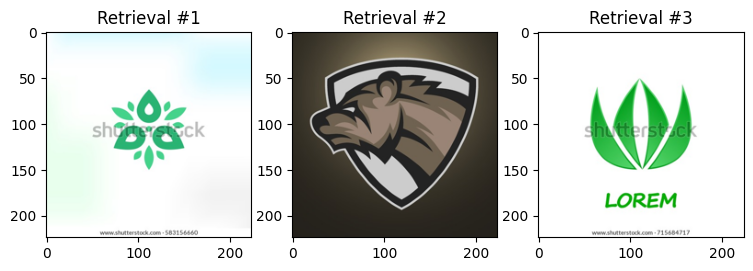

Arithmetic:
CEOs/bill_gates + (companies/tesla - CEOs/elon_musk)
Expected result: companies/microsoft
Model generated outputs:
[<PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1D5D54E0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1D5D47C0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1D5B6FE0>]


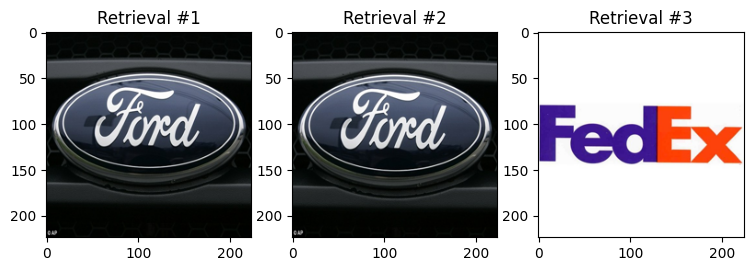

Arithmetic:
CEOs/elon_musk + (companies/amazon - CEOs/jeff_bezos)
Expected result: companies/tesla
Model generated outputs:
[<PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1C498E20>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1C498D00>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1C498BB0>]


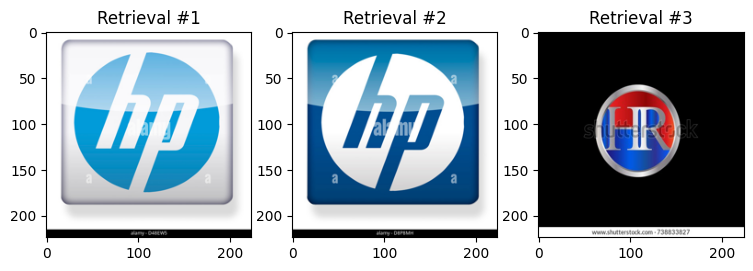

Arithmetic:
CEOs/jeff_bezos + (companies/apple - CEOs/steve_jobs)
Expected result: companies/amazon
Model generated outputs:
[<PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1C3AEC50>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1C4074C0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1C3AF040>]


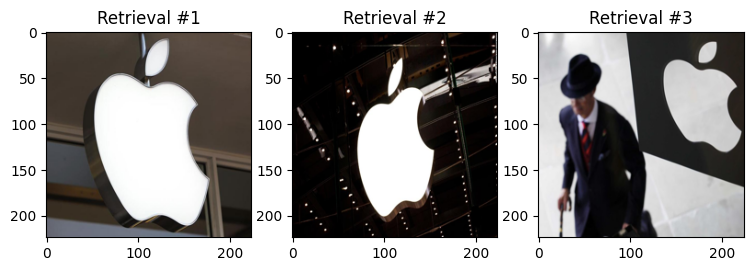

Arithmetic:
CEOs/steve_jobs + (companies/facebook - CEOs/mark_zuckerberg)
Expected result: companies/apple
Model generated outputs:
[<PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1A4950F0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1A497C10>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1A495150>]


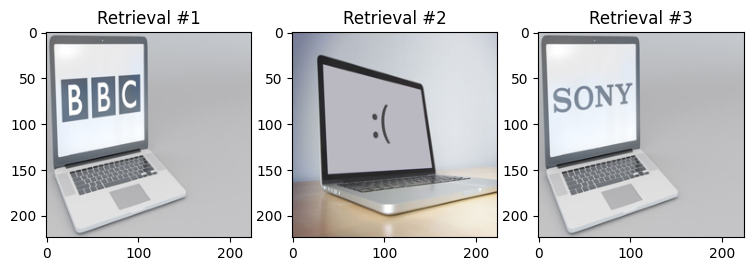

flags -> capital
Arithmetic:
cities/beijing + (flags/egypt - cities/cairo)
Expected result: flags/china
Model generated outputs:
[<PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1A221DB0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1A3AB130>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1A201090>]


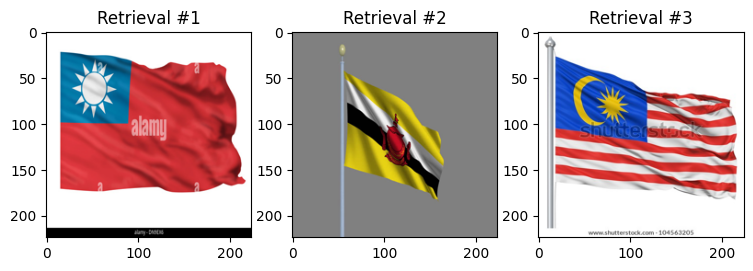

Arithmetic:
cities/cairo + (flags/australia - cities/canberra)
Expected result: flags/egypt
Model generated outputs:
 flag with the sun and the flag with the flag with the sun and the flag with the sun and the flag with the sun and the flag with the sun and the flag with the sun and the flag with the sun and the flag with the sun and the flag with the sun and the flag with the sun and the flag with the sun and the flag with the sun and the flag with the sun and the flag with the sun and the flag with the sun and the flag with the sun and the flag
Arithmetic:
cities/canberra + (flags/cuba - cities/havana)
Expected result: flags/australia
Model generated outputs:
[<PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1A2E77F0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1A135A80>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1A2E4EE0>]


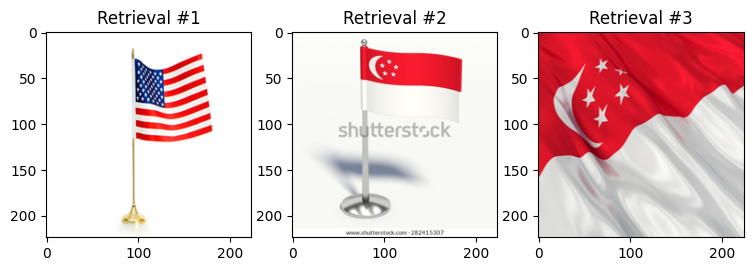

Arithmetic:
cities/havana + (flags/afghanistan - cities/kabul)
Expected result: flags/cuba
Model generated outputs:
[<PIL.Image.Image image mode=RGB size=224x224 at 0x7FB9FDF39E70>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FB9FDF083A0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FB9FDF0B1F0>]


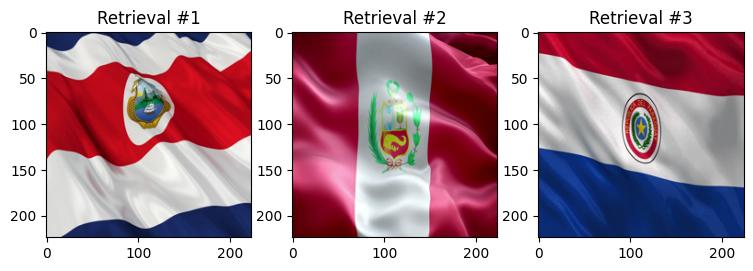

Arithmetic:
cities/kabul + (flags/england - cities/london)
Expected result: flags/afghanistan
Model generated outputs:
[<PIL.Image.Image image mode=RGB size=224x224 at 0x7FB8D2F5DC30>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FB8D2F5D8A0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FB8D2F5DA80>]


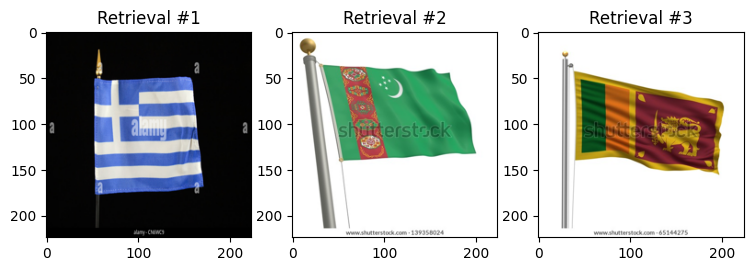

Arithmetic:
cities/london + (flags/japan - cities/tokyo)
Expected result: flags/england
Model generated outputs:
[<PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1C3E0A90>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1A4E4FD0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1A4E5090>]


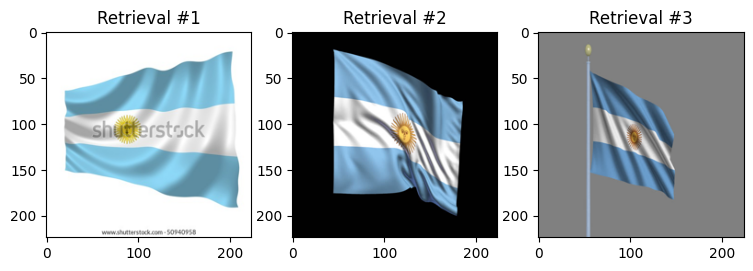

Arithmetic:
cities/tokyo + (flags/russia - cities/moscow)
Expected result: flags/japan
Model generated outputs:
[<PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1C3AF460>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1C3AF340>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1C3AFAC0>]


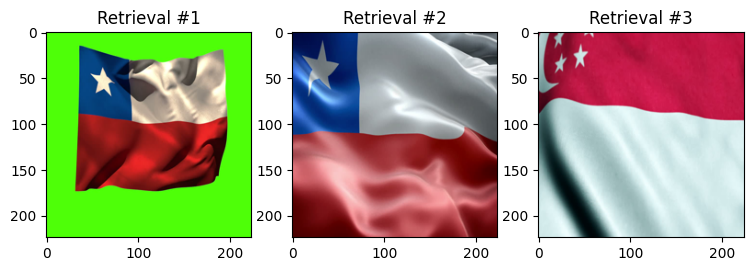

Arithmetic:
cities/moscow + (flags/france - cities/paris)
Expected result: flags/russia
Model generated outputs:
[<PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1D5D7D30>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1D5D7AF0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1D67EE00>]


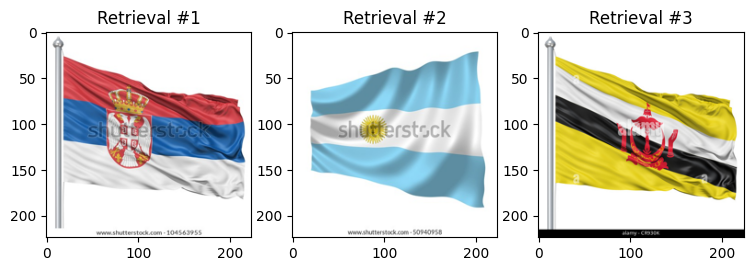

Arithmetic:
cities/paris + (flags/usa - cities/washington)
Expected result: flags/france
Model generated outputs:
[<PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1C4AB5E0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1C4A9030>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1C410F40>]


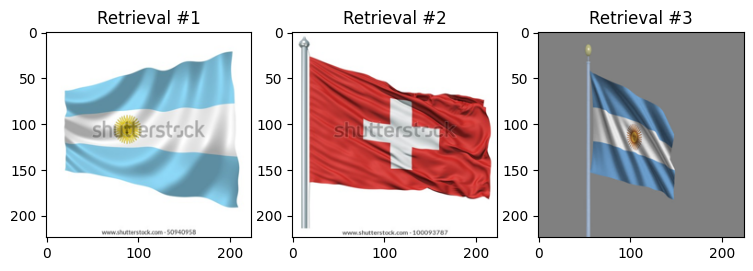

Arithmetic:
cities/washington + (flags/germany - cities/berlin)
Expected result: flags/usa
Model generated outputs:
[<PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1A3A8550>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1A372560>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1A3A8790>]


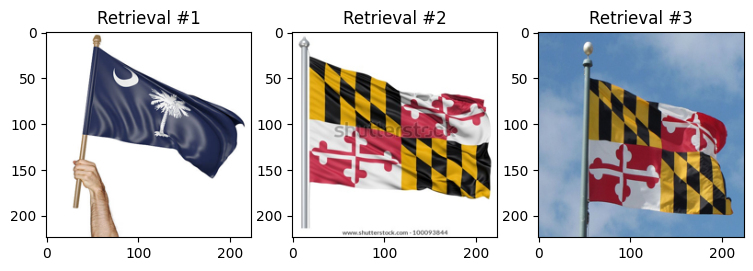

Arithmetic:
cities/berlin + (flags/thailand - cities/bangkok)
Expected result: flags/germany
Model generated outputs:
[<PIL.Image.Image image mode=RGB size=224x224 at 0x7FB9FDF44F10>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FB9FDF453C0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1A4B4640>]


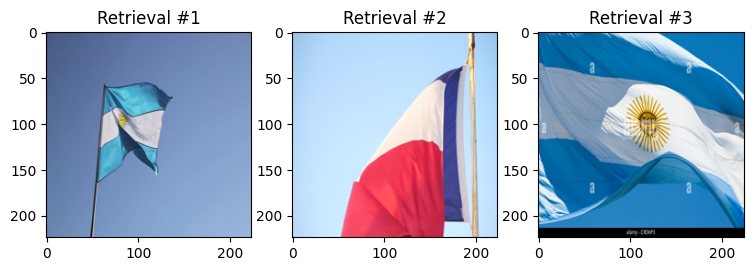

Arithmetic:
cities/bangkok + (flags/china - cities/beijing)
Expected result: flags/thailand
Model generated outputs:
[<PIL.Image.Image image mode=RGB size=224x224 at 0x7FB9FDE3B040>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FB9FDE3B370>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FB9FDEB2D40>]


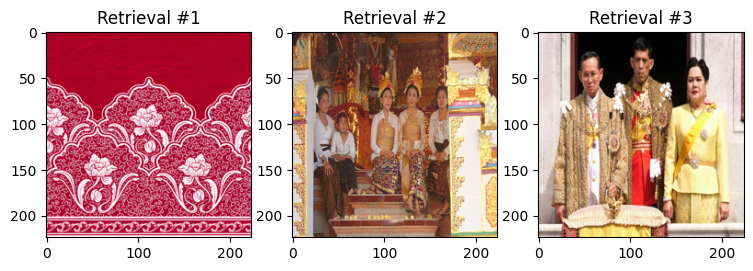

countries -> food
Arithmetic:
food/baguette + (countries/japan - food/sushi)
Expected result: countries/france
Model generated outputs:
[<PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1A1113F0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1A110280>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1A113190>]


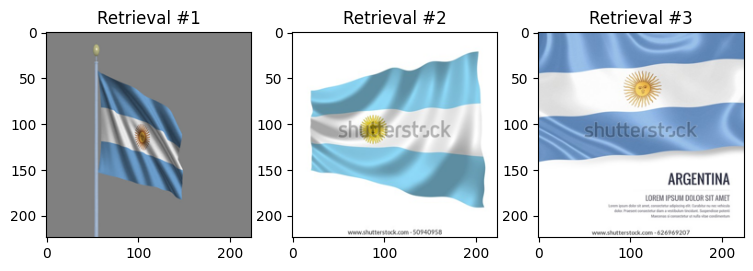

Arithmetic:
food/sushi + (countries/italy - food/pizza)
Expected result: countries/japan
Model generated outputs:
[<PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1D5B6BC0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1D5B5D20>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1D5B4B80>]


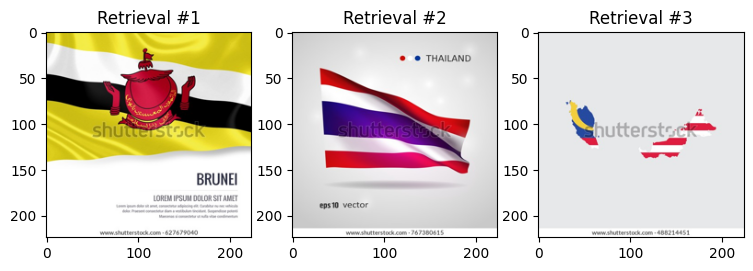

Arithmetic:
food/pizza + (countries/france - food/baguette)
Expected result: countries/italy
Model generated outputs:
[<PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1C4994B0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1C49A2F0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1C4998A0>]


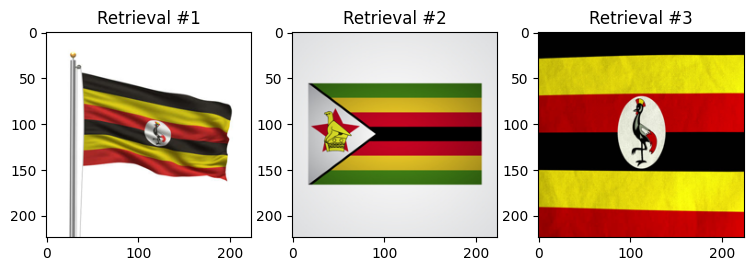

countries -> building
Arithmetic:
building/capitol + (countries/china - building/china_wall)
Expected result: countries/usa
Model generated outputs:
[<PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1C3AE8F0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1C3ADA20>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1C3AD060>]


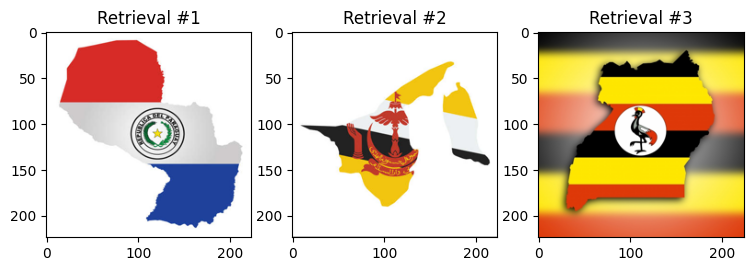

Arithmetic:
building/china_wall + (countries/italy - building/colosseum)
Expected result: countries/china
Model generated outputs:
[<PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1A3D4B50>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1A3D5570>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1A3D42B0>]


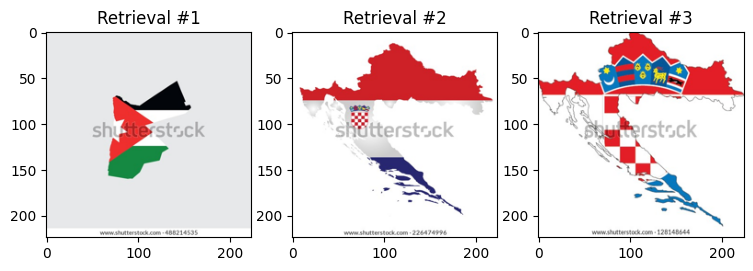

Arithmetic:
building/colosseum + (countries/france - building/eiffle)
Expected result: countries/italy
Model generated outputs:
[<PIL.Image.Image image mode=RGB size=224x224 at 0x7FB8D2F52B00>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1A2E4640>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FB9FDF56CE0>]


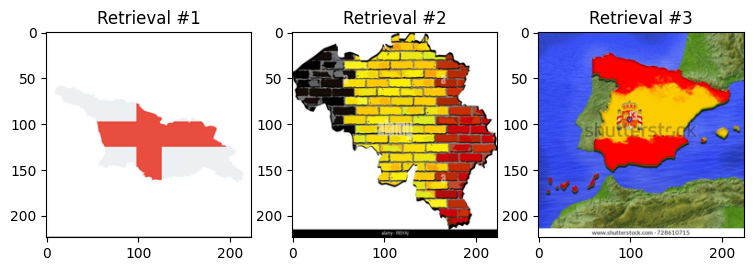

Arithmetic:
building/eiffle + (countries/russia - building/kremlin)
Expected result: countries/france
Model generated outputs:
[<PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1A222110>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1A220520>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1A223130>]


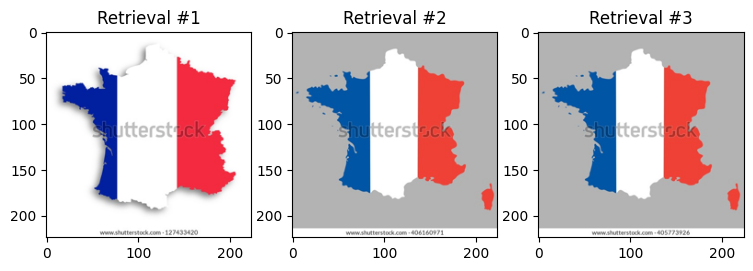

Arithmetic:
building/kremlin + (countries/italy - building/pisa)
Expected result: countries/russia
Model generated outputs:
 flag.
Arithmetic:
building/pisa + (countries/egypt - building/pyramid)
Expected result: countries/italy
Model generated outputs:
[<PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1A2AF130>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1A29F010>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1A3B8EB0>]


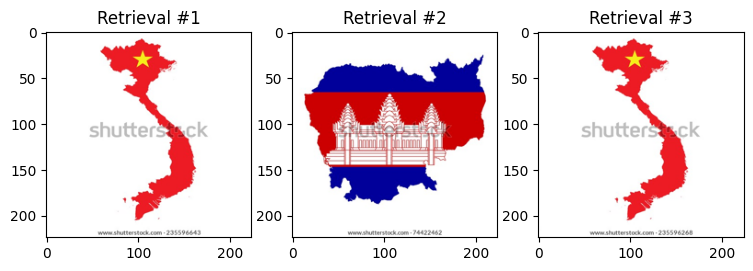

Arithmetic:
building/pyramid + (countries/india - building/taj_mahal)
Expected result: countries/egypt
Model generated outputs:
[<PIL.Image.Image image mode=RGB size=224x224 at 0x7FB9FDF7F490>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1A2E7DF0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FB9FDF7F6A0>]


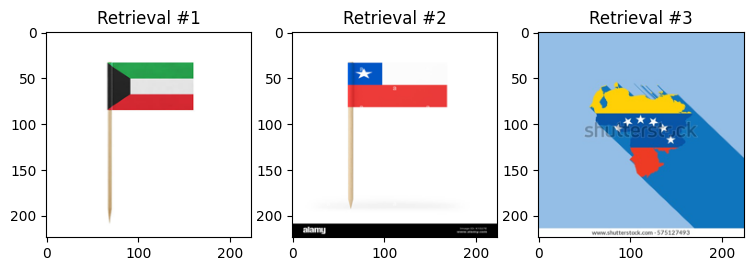

Arithmetic:
building/taj_mahal + (countries/usa - building/capitol)
Expected result: countries/india
Model generated outputs:
[<PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1C3E16F0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1C3E1810>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1C3E1D20>]


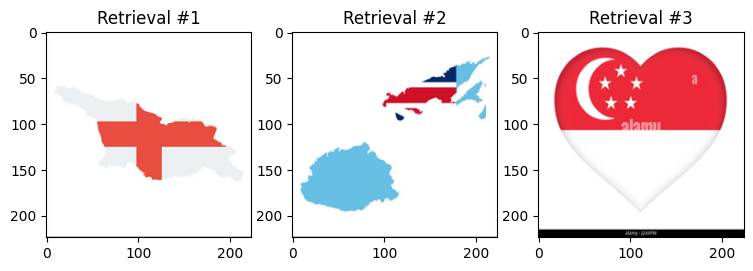

flags -> leaders
Arithmetic:
leaders/angela_merkel + (flags/england - leaders/boris_johnson)
Expected result: flags/germany
Model generated outputs:
[<PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1A46B790>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1C4C5CC0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1A4683D0>]


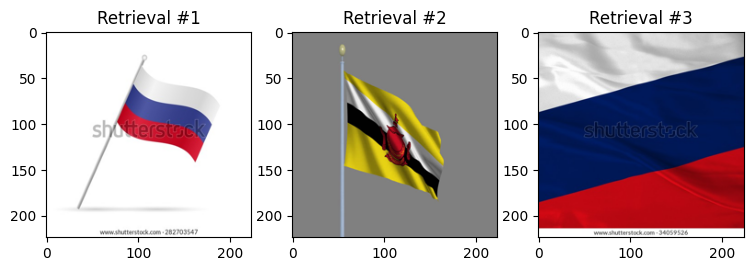

Arithmetic:
leaders/boris_johnson + (flags/england - leaders/david_cameron)
Expected result: flags/england
Model generated outputs:
[<PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1C42B400>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1C42A8F0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1C428AC0>]


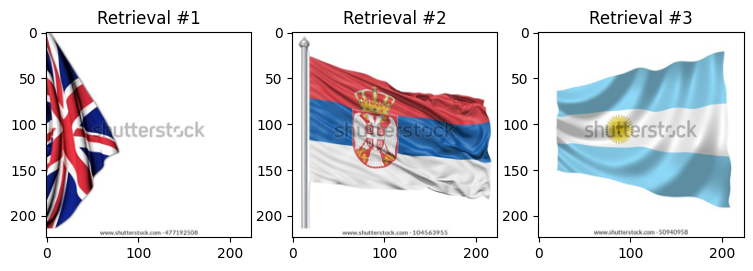

Arithmetic:
leaders/david_cameron + (flags/usa - leaders/hillary)
Expected result: flags/england
Model generated outputs:
[<PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1D711CC0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1D7107F0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1D710B50>]


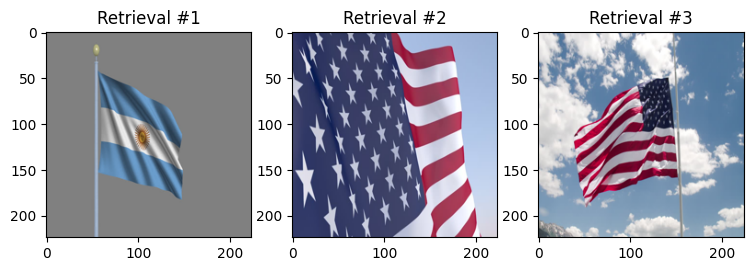

Arithmetic:
leaders/hillary + (flags/canada - leaders/justin_trudeau)
Expected result: flags/usa
Model generated outputs:
[<PIL.Image.Image image mode=RGB size=224x224 at 0x7FB9FDEE9BA0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FB9FDEB0B80>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1D5B46D0>]


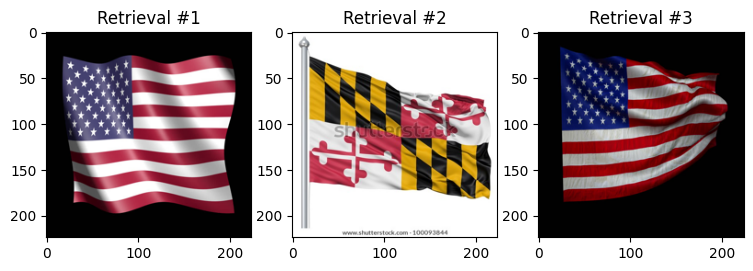

Arithmetic:
leaders/justin_trudeau + (flags/usa - leaders/obama)
Expected result: flags/canada
Model generated outputs:
[<PIL.Image.Image image mode=RGB size=224x224 at 0x7FB9FDFDBC10>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1C413880>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1C4134C0>]


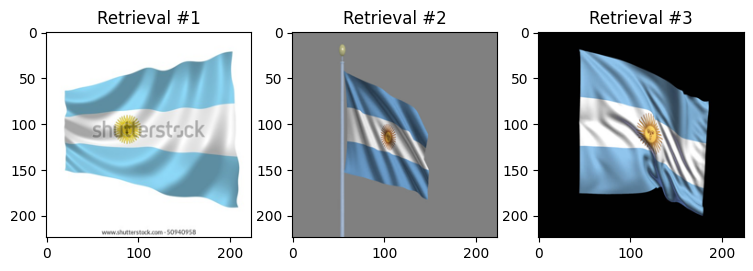

Arithmetic:
leaders/obama + (flags/russia - leaders/putin)
Expected result: flags/usa
Model generated outputs:
 flag on a white background (Photo by Ramiro Ramiro/Getty Images)
Arithmetic:
leaders/putin + (flags/england - leaders/queen_elizabeth)
Expected result: flags/russia
Model generated outputs:
[<PIL.Image.Image image mode=RGB size=224x224 at 0x7FB9FDE384C0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FB9FDE3AC80>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FB9FDE3B280>]


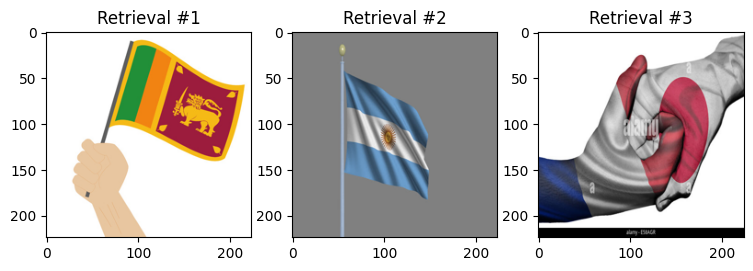

Arithmetic:
leaders/queen_elizabeth + (flags/usa - leaders/trump)
Expected result: flags/england
Model generated outputs:
[<PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1C413DF0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1C412BC0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FB9FDEB03D0>]


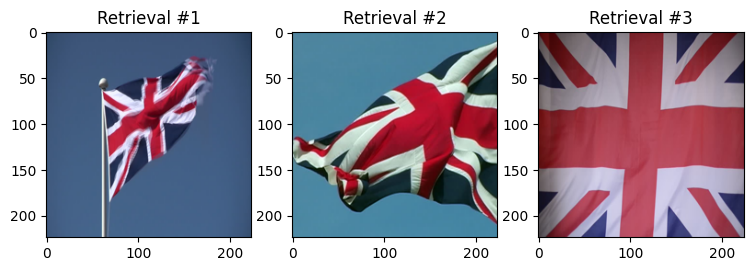

Arithmetic:
leaders/trump + (flags/china - leaders/xi_jinping)
Expected result: flags/usa
Model generated outputs:
[<PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1A300160>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1A301660>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1A300940>]


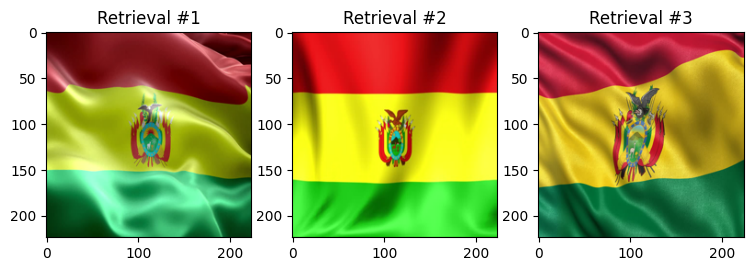

Arithmetic:
leaders/xi_jinping + (flags/germany - leaders/angela_merkel)
Expected result: flags/china
Model generated outputs:
[<PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1D713DF0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1D711600>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7FBA1D712170>]


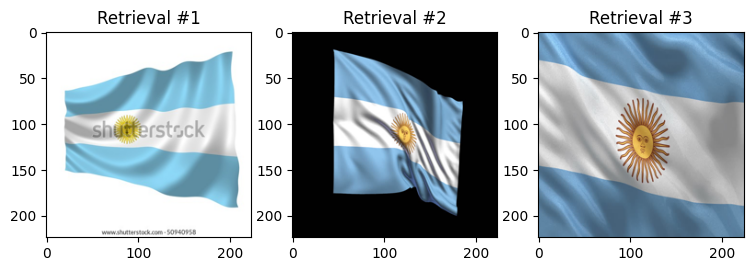

In [6]:
for relation, values in relations_dict.items():
    print(relation)
    print('=' * 120)
    for i in range(0, len(values)):
        tuple1 = values[i]
        
        if i == len(values)-1:
            tuple2 = values[0]
        else:
            tuple2 = values[i+1]
        
        print('='*60)
        print("Arithmetic:")
        print("{} + ({} - {})".format(tuple1[1], tuple2[0], tuple2[1]))
        print("Expected result: {}".format(tuple1[0]))

        inp_image = model.visual_embs[tuple1[1]] + (model.visual_embs[tuple2[0]] - model.visual_embs[tuple2[1]])
        prompt = [inp_image, "[RET]"]

        print('=' * 30)
        model_outputs = model.generate_for_images_and_texts(prompt, num_words=100, max_img_per_ret=3)

        print('Model generated outputs:')
        display_interleaved_outputs(model_outputs, one_img_per_ret=False)